# Libraries

In [1]:
import matplotlib.cm as cm
import matplotlib.patheffects as pe
import matplotlib.pyplot as plt
import numpy as np
import sys
from matplotlib.colors import LogNorm
from PIL import Image
from scipy import ndimage,interpolate
from matplotlib.patches import Rectangle

# Import custom libraries for this notebook
indir='/Path/To/Repository/'
if indir+'Code' not in sys.path: sys.path.append(indir+'Code')
import CNT_Analysis_Functions as CNT_F

%load_ext autoreload
%autoreload 2
%matplotlib inline

# rcParams

In [2]:
plt.rcParams['lines.linewidth']=0.75
plt.rcParams['lines.color']='r'
plt.rcParams['image.cmap']='gist_gray'
plt.rcParams['font.size']=7
plt.rcParams['ytick.major.size']=2
plt.rcParams['xtick.major.size']=2
plt.rcParams['ytick.major.pad']=0.5
plt.rcParams['xtick.major.pad']=0.5
plt.rcParams['axes.labelpad']=1
plt.rcParams['figure.subplot.wspace']=0.3
plt.rcParams['pdf.fonttype']=42
plt.rcParams['ps.fonttype']=42
plt.rcParams['font.family']='sans-serif'
plt.rcParams['font.sans-serif']=['Arial'] 
plt.rcParams['mathtext.fontset']='custom'  
plt.rcParams['mathtext.rm']='Arial'      
plt.rcParams['mathtext.it']='Arial:italic' 
plt.rcParams['mathtext.bf']='Arial:bold' 

stroke=[pe.withStroke(linewidth=1,foreground='k')]


# EELS Schematic

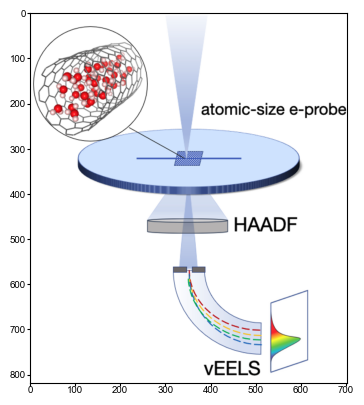

In [3]:
schematic=Image.open(indir+'Data/Schematics/EELS_Schematic.png')
plt.imshow(schematic)

# TEM Image

[Text(0.5, 0, 'nm (calibrated)'), -147.32142857142858, 656.25]

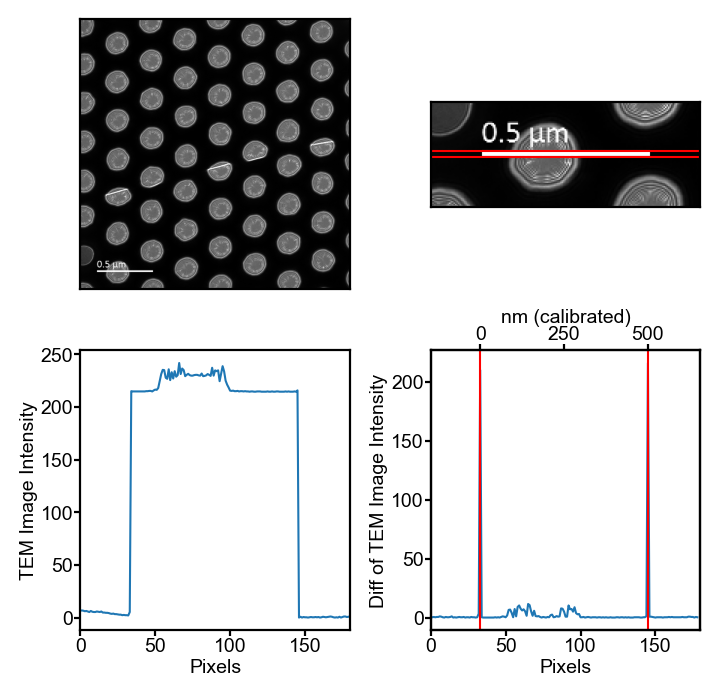

In [4]:
# Load Image
LargeFOV=Image.open(indir+'Data/Images/LargeFOV_TEM.png')
LargeFOV=np.asarray(LargeFOV.convert('L'))

# Convert native scale bar to pixel calibration
f,a=plt.subplots(2,2,dpi=200,figsize=(4,4))
plt.setp(a[0],xticks=[],yticks=[])
a[0,0].imshow(LargeFOV)

Y1=32;Y2=36
a[0,1].imshow(LargeFOV[470:,:180])
a[0,1].axhline(Y1);a[0,1].axhline(Y2)

ScaleBar_Prof=np.average(LargeFOV[470+Y1:470+Y2,:180],axis=0)
plt.setp(a[1],xlabel='Pixels',ylabel='TEM Image Intensity',xlim=(0,180))
a[1,0].plot(ScaleBar_Prof)

ScaleBar_Prof_Diff=np.abs(np.diff(ScaleBar_Prof))
plt.setp(a[1,1],xlabel='Pixels',ylabel='Diff of TEM Image Intensity')
a[1,1].plot(ScaleBar_Prof_Diff)
X1,X2=np.sort(np.argsort(ScaleBar_Prof_Diff)[-2:])
a[1,1].axvline(X1);a[1,1].axvline(X2)

TEM_Scale=500 # nm
Pixel_Scale=X2-X1 # pixels
LargeFOV_cal=TEM_Scale/Pixel_Scale # nm/pixel

a11_cal=a[1,1].twiny()
plt.setp(a11_cal,xlabel='nm (calibrated)',xlim=(-X1*LargeFOV_cal,(180-X1)*LargeFOV_cal))


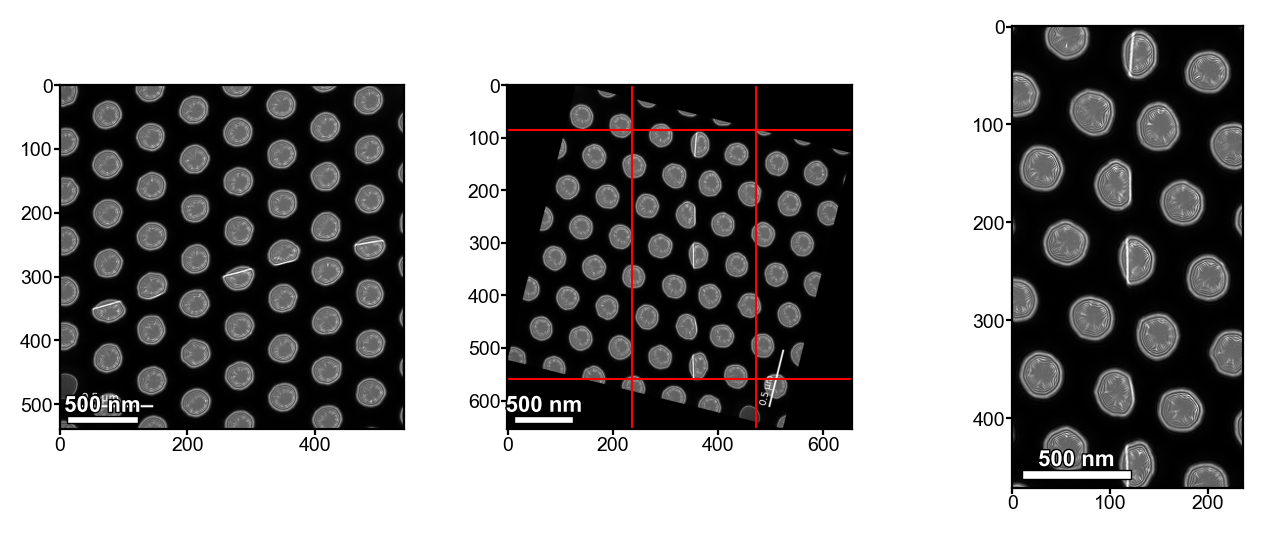

In [5]:
# Rotate TEM image to Vertical and Crop
f,a=plt.subplots(1,3,dpi=200,figsize=(8,3))
a[0].imshow(LargeFOV)

LargeFOV_rot=ndimage.rotate(LargeFOV,76)
a[1].imshow(LargeFOV_rot)
Crop_X1,Crop_X2=236,472
Crop_Y1,Crop_Y2=86,558
a[1].axhline(Crop_Y1);a[1].axhline(Crop_Y2)
a[1].axvline(Crop_X1);a[1].axvline(Crop_X2)

LargeFOV_rot_crop=LargeFOV_rot[Crop_Y1:Crop_Y2,Crop_X1:Crop_X2]
a[2].imshow(LargeFOV_rot_crop)

CNT_F.AddScaleBar(a[0],500,LargeFOV_cal)
CNT_F.AddScaleBar(a[1],500,LargeFOV_cal)
CNT_F.AddScaleBar(a[2],500,LargeFOV_cal) 

# STEM Image

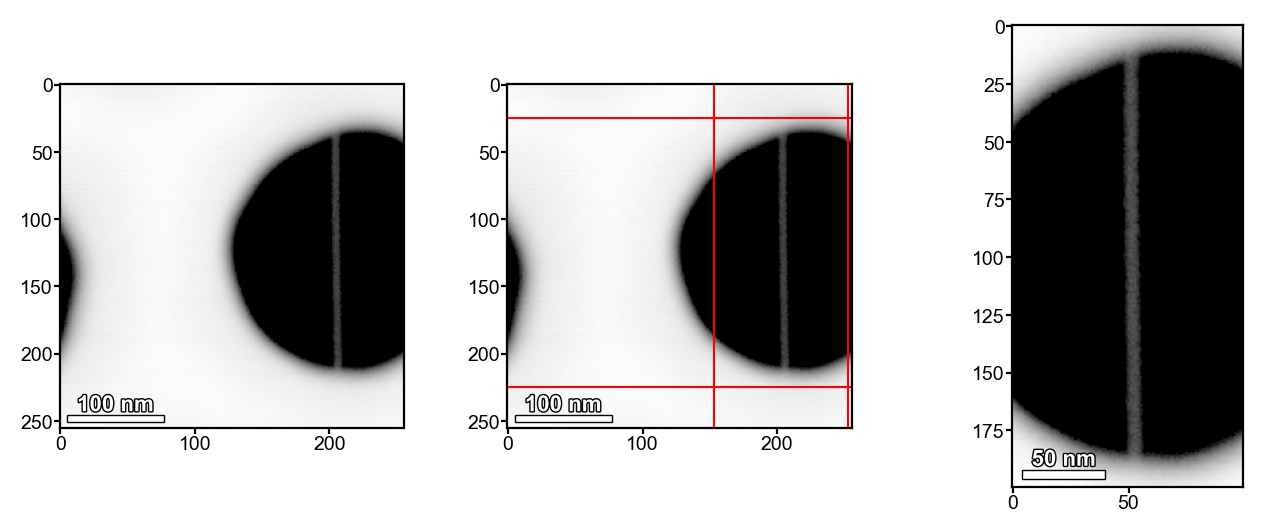

In [6]:
# Load STEM image and Crop
SmallFOV,SmallFOV_cal,mdat=CNT_F.LoadImage(indir+'Data/Images/SmallFOV_STEM.npy')

f,a=plt.subplots(1,3,dpi=200,figsize=(8,3))
a[0].imshow(CNT_F.NormArray(SmallFOV),norm=LogNorm(vmin=0.005,vmax=1))
a[1].imshow(CNT_F.NormArray(SmallFOV),norm=LogNorm(vmin=0.005,vmax=1))

Crop_X1,Crop_X2=153,253
Crop_Y1,Crop_Y2=25,225
a[1].axhline(Crop_Y1);a[1].axhline(Crop_Y2)
a[1].axvline(Crop_X1);a[1].axvline(Crop_X2)

SmallFOV_crop=SmallFOV[Crop_Y1:Crop_Y2,Crop_X1:Crop_X2]
a[2].imshow(CNT_F.NormArray(SmallFOV_crop),norm=LogNorm(vmin=0.005,vmax=1))

CNT_F.AddScaleBar(a[0],100,SmallFOV_cal)
CNT_F.AddScaleBar(a[1],100,SmallFOV_cal)
CNT_F.AddScaleBar(a[2],50,SmallFOV_cal) 


# vEEL Point Spectra

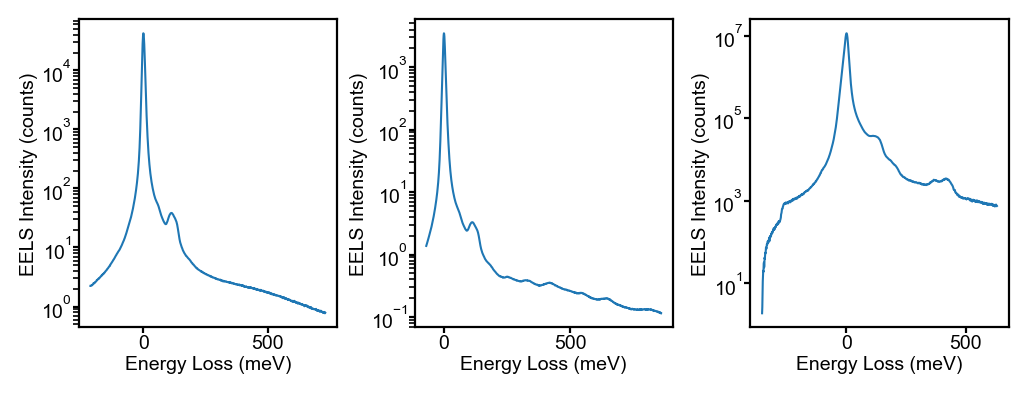

In [7]:
#Load Raw Datasets
filename=indir+'Data/vEEL_Point_Spectra/EmptyCNT_RT'
ECNT_E=np.load(filename+'_E.npy')
ECNT_S=np.load(filename+'_S.npy')

filename=indir+'Data/vEEL_Point_Spectra/FilledCNT_2pt3nm_RT'
FCNT_E=np.load(filename+'_E.npy')
FCNT_S=np.load(filename+'_S.npy')

filename=indir+'Data/vEEL_Point_Spectra/LiquidCell_RT'
LC_E=np.load(filename+'_E.npy')
LC_S=np.load(filename+'_S.npy')

f,a=plt.subplots(1,3,dpi=200,figsize=(6,2))
plt.setp(a,xlabel='Energy Loss (meV)',ylabel='EELS Intensity (counts)')
a[0].plot(ECNT_E*1000,ECNT_S)
a[0].set_yscale('log')
a[1].plot(FCNT_E*1000,FCNT_S)
a[1].set_yscale('log')
a[2].plot(LC_E*1000,LC_S)
a[2].set_yscale('log')

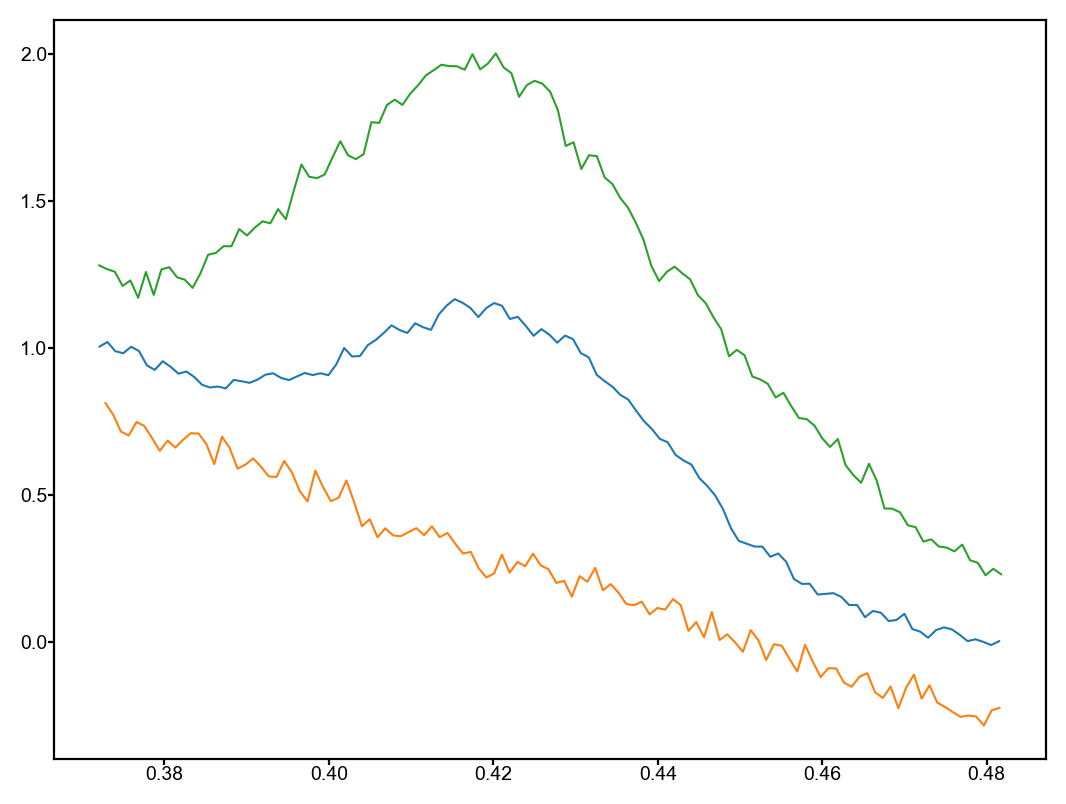

In [8]:
# Normalize to O-H stretch Energy Range (375 to 475 meV to avoid other peaks from contamination and combination bands)

PS_E1=0.3725;PS_E2=0.4825
LC_i1,LC_i2=CNT_F.Get_i(LC_E,PS_E1),CNT_F.Get_i(LC_E,PS_E2)
ECNT_i1,ECNT_i2=CNT_F.Get_i(ECNT_E,PS_E1),CNT_F.Get_i(ECNT_E,PS_E2)
FCNT_i1,FCNT_i2=CNT_F.Get_i(FCNT_E,PS_E1),CNT_F.Get_i(FCNT_E,PS_E2) 

LC_E_C=LC_E[LC_i1:LC_i2];LC_S_C=LC_S[LC_i1:LC_i2]
ECNT_E_C=ECNT_E[ECNT_i1:ECNT_i2];ECNT_S_C=ECNT_S[ECNT_i1:ECNT_i2]
FCNT_E_C=FCNT_E[FCNT_i1:FCNT_i2];FCNT_S_C=FCNT_S[FCNT_i1:FCNT_i2]

LC_S_C_m=np.average(LC_S_C[-5:]);LC_S_C_M=np.average(LC_S_C[:5]);LC_S_CN=(LC_S_C-LC_S_C_m)/(LC_S_C_M-LC_S_C_m)
ECNT_S_C_m=np.average(ECNT_S_C[-5:]);ECNT_S_C_M=np.average(ECNT_S_C[:5]);ECNT_S_CN=(ECNT_S_C-ECNT_S_C_m)/(ECNT_S_C_M-ECNT_S_C_m)
FCNT_S_C_m=np.average(FCNT_S_C[-5:]);FCNT_S_C_M=np.average(FCNT_S_C[:5]);FCNT_S_CN=(FCNT_S_C-FCNT_S_C_m)/(FCNT_S_C_M-FCNT_S_C_m)
f,a=plt.subplots(1,1,dpi=200)
a.plot(LC_E_C,LC_S_CN)
a.plot(ECNT_E_C,ECNT_S_CN-0.25)
a.plot(FCNT_E_C,FCNT_S_CN+0.25)


# vEEL Spectrum Images

Note: Preprocessing shown here to demonstrate how drift/scan distortions handled in acquisitions

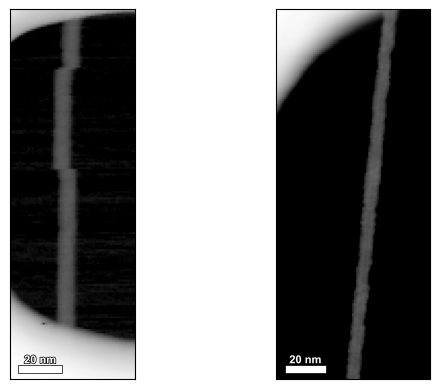

In [9]:
# Load Raw Data (Simultaneous HAADF)
filename=indir+'Data/vEEL_Spectrum_Images/EmptyCNT_Cryo_SI_Z.npy'
ECNT_SI_Z_dat,ECNT_SI_Z_cal,ECNT_SI_Z_mdat=CNT_F.LoadImage(filename)

filename=indir+'Data/vEEL_Spectrum_Images/FilledCNT_2pt3nm_Cryo_SI_Z.npy'
FCNT_SI_Z_dat,FCNT_SI_Z_cal,FCNT_SI_Z_mdat=CNT_F.LoadImage(filename)

f,a=plt.subplots(1,2)
plt.setp(a,xticks=[],yticks=[])
a[0].imshow(CNT_F.NormArray(ECNT_SI_Z_dat),norm=LogNorm(vmin=0.005,vmax=1))
a[1].imshow(CNT_F.NormArray(FCNT_SI_Z_dat),norm=LogNorm(vmin=0.005,vmax=1))
CNT_F.AddScaleBar(a[0],20,ECNT_SI_Z_cal)
CNT_F.AddScaleBar(a[1],20,FCNT_SI_Z_cal)

## Load As Acquired Spectrum Images

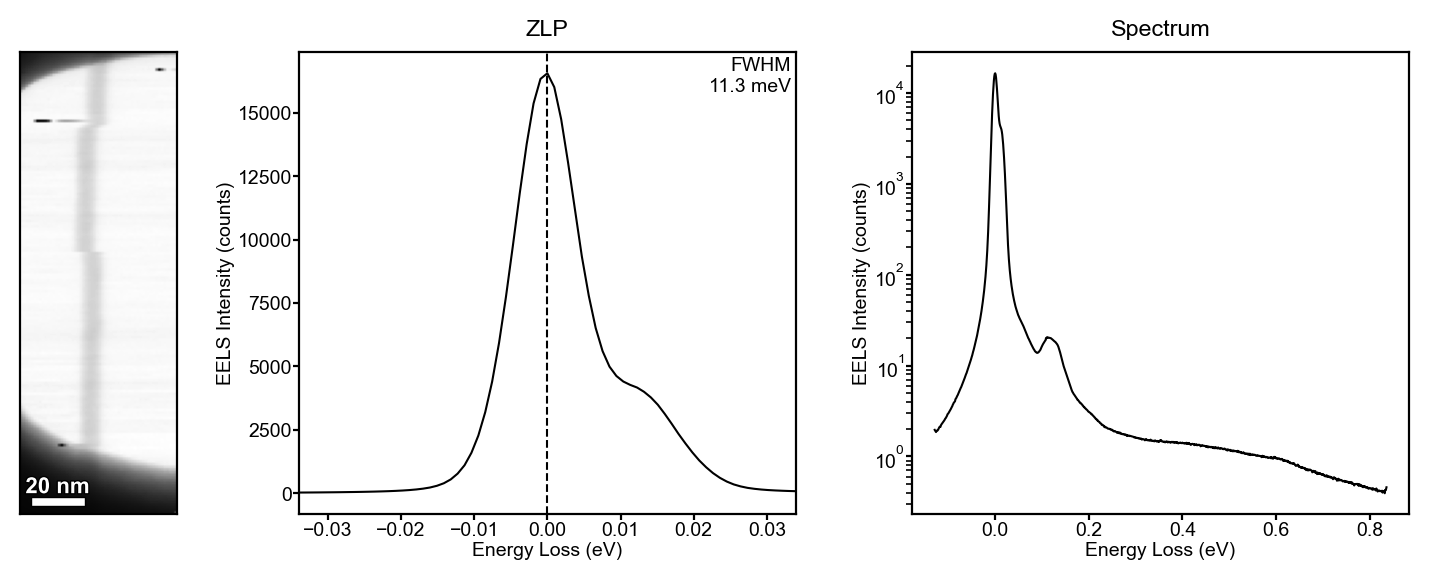

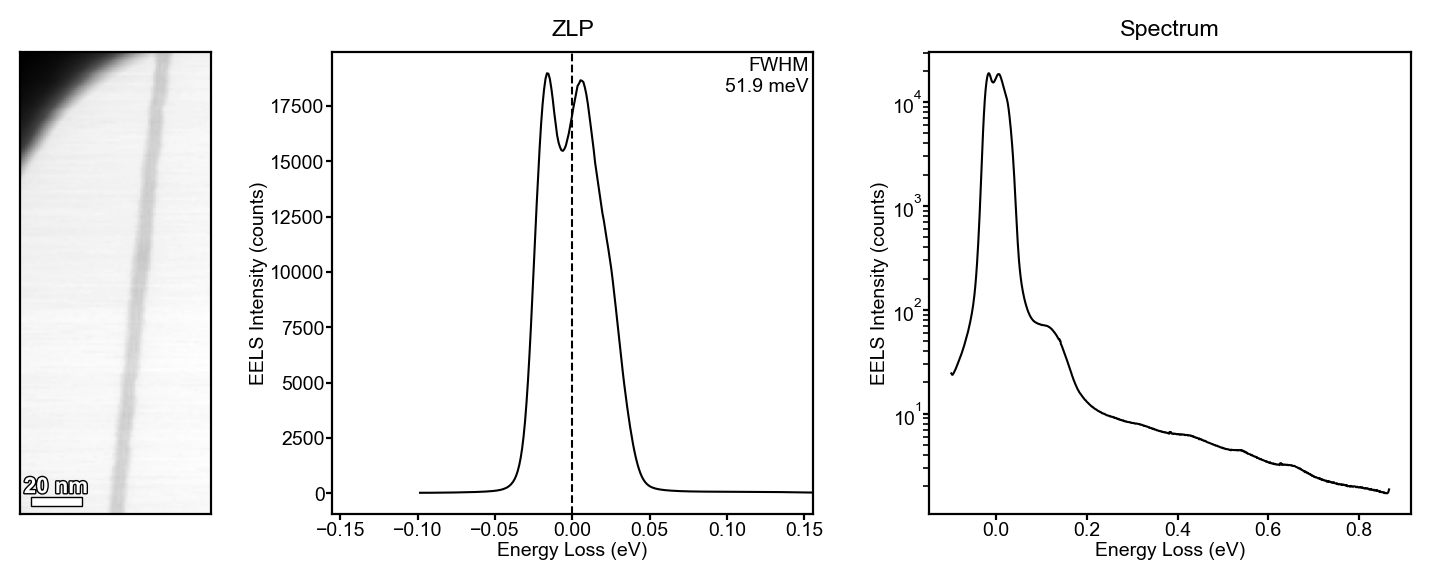

In [10]:
# Align ZLPs in Datasets
filename=indir+'Data/vEEL_Spectrum_Images/EmptyCNT_Cryo_SI.npy'
ECNT_SI_dat,ECNT_SI_cal,ECNT_SI_disp,ECNT_SI_mdat=CNT_F.LoadEELS_SI(filename)

filename=indir+'Data/vEEL_Spectrum_Images/FilledCNT_2pt3nm_Cryo_SI.npy'
FCNT_SI_dat,FCNT_SI_cal,FCNT_SI_disp,FCNT_SI_mdat=CNT_F.LoadEELS_SI(filename)

#Display As Acquired SI
CNT_F.Display_SI(ECNT_SI_dat,ECNT_SI_disp,ECNT_SI_cal,scale=20)
CNT_F.Display_SI(FCNT_SI_dat,FCNT_SI_disp,FCNT_SI_cal,scale=20)

## Calibrate ZLPs in each pixel

Finding Calibrated Energy Axes
100%

Aligning Spectra to Calibrated Energy Axes
100% (FINISHED!)

Finding Calibrated Energy Axes
100%

Aligning Spectra to Calibrated Energy Axes
100% (FINISHED!)



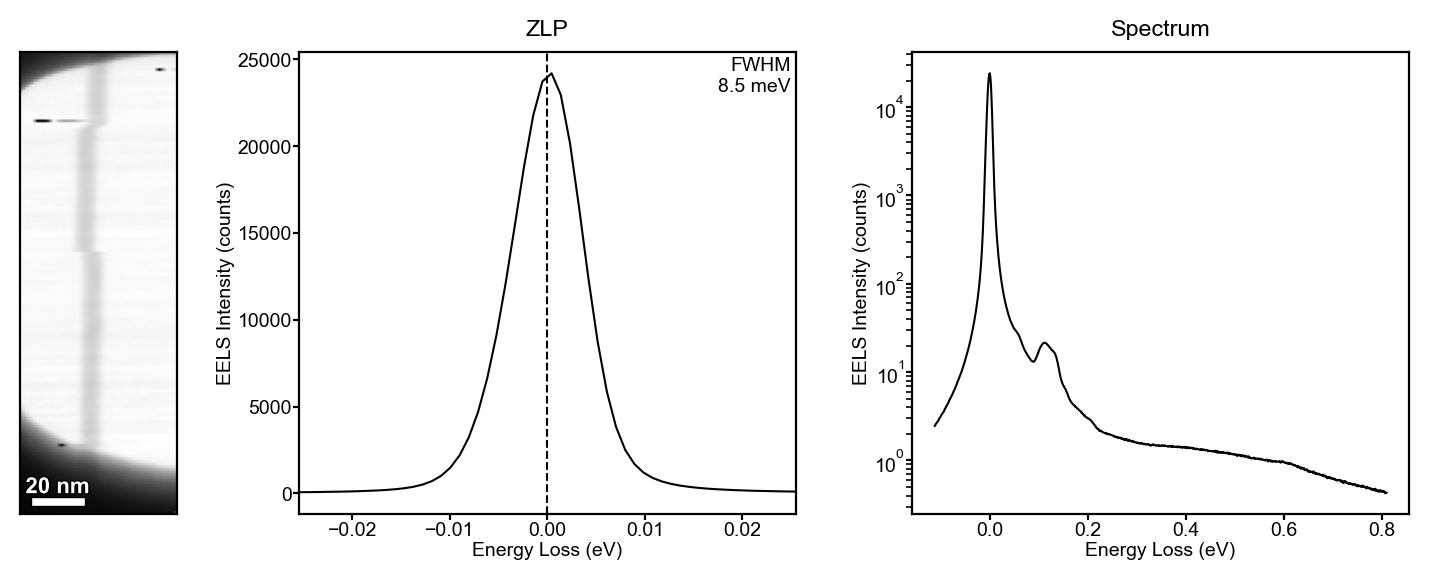

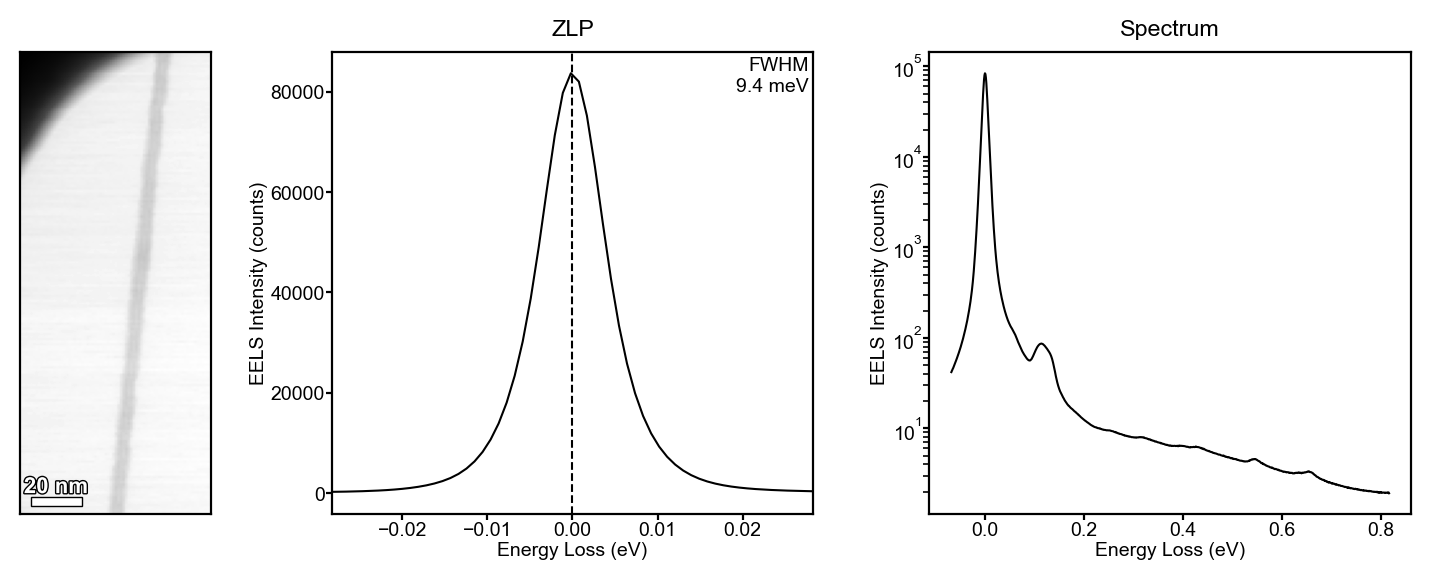

In [11]:
ECNT_SI_ens=CNT_F.GetSpectraEnergyAxes(ECNT_SI_dat,ECNT_SI_disp)
ECNT_SI_E,ECNT_SI=CNT_F.GetCalibratedSpectra(ECNT_SI_dat,ECNT_SI_ens)

FCNT_SI_ens=CNT_F.GetSpectraEnergyAxes(FCNT_SI_dat,FCNT_SI_disp)
FCNT_SI_E,FCNT_SI=CNT_F.GetCalibratedSpectra(FCNT_SI_dat,FCNT_SI_ens)

CNT_F.Display_SI(ECNT_SI,ECNT_SI_disp,ECNT_SI_cal,scale=20,en=ECNT_SI_E)
CNT_F.Display_SI(FCNT_SI,FCNT_SI_disp,FCNT_SI_cal,scale=20,en=FCNT_SI_E)

## Fix Spatial Drift/Scan Artifacts

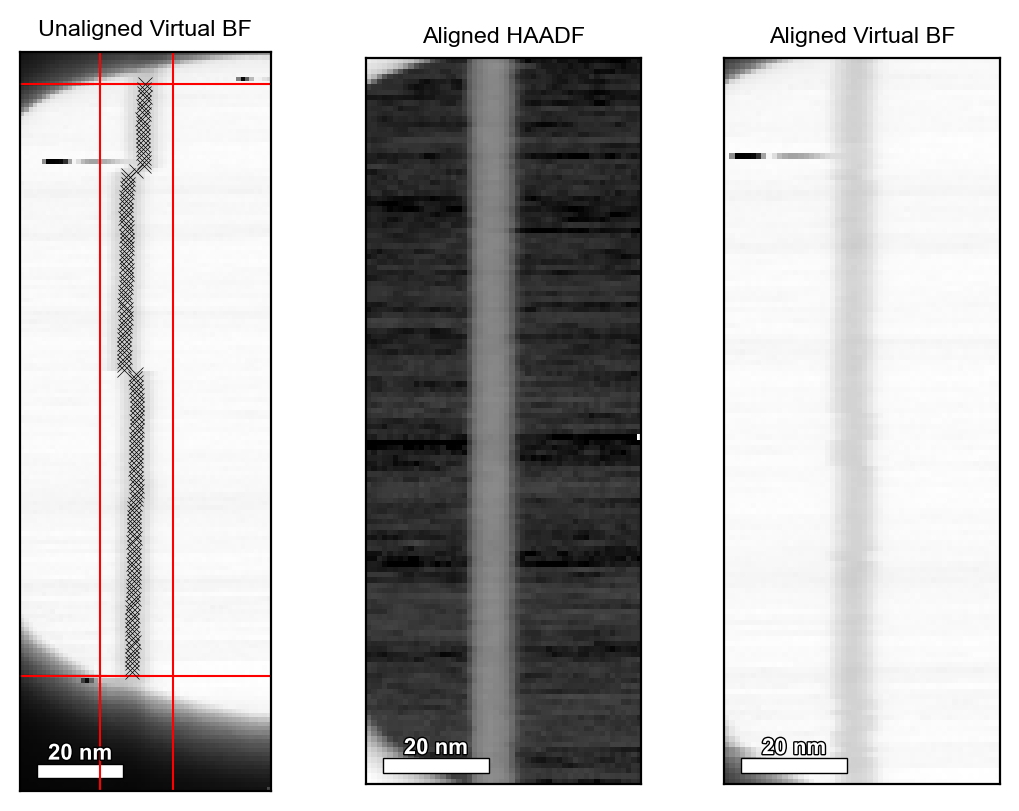

In [12]:
# Empty CNT

# Sum to get virtual BF image
ECNT_SI_Sum=np.sum(ECNT_SI,axis=2)
f,a=plt.subplots(1,3,dpi=200)
plt.setp(a,xticks=[],yticks=[])
a[0].imshow(ECNT_SI_Sum)
a[0].set_title('Unaligned Virtual BF')
CNT_F.AddScaleBar(a[0],20,ECNT_SI_cal)

# Choose Fit Region
X1,X2,Y1,Y2=18,35,7,144
a[0].axvline(X1);a[0].axvline(X2);a[0].axhline(Y1);a[0].axhline(Y2)

# Find CNT Centers
TubeCenter=[]
for i in range(Y1,Y2):
    Prof=CNT_F.NormArray(-ndimage.gaussian_filter1d(ECNT_SI_Sum[i][X1:X2],2))
    if i!=25: fwhm=CNT_F.Get_FWFM(np.arange(X2-X1),Prof,0.5,fitpoly=True)
    hm_lo,hm_hi,w,i_c=fwhm
    a[0].plot(i_c+X1,i,marker='x',lw=0,mfc='None',ms=5,mec='k',mew=0.25)
    TubeCenter.append(i_c)

# Align CNT Centers to straight line
TubeCenter_Min =np.amin(TubeCenter)
TubeCenter_Diff=int(np.ceil(np.ptp(TubeCenter)))+1

ECNT_SI_Z_al=np.zeros((Y2-Y1,ECNT_SI_Z_dat.shape[1]-TubeCenter_Diff))
ECNT_SI_al  =np.zeros((Y2-Y1,ECNT_SI.shape[1]      -TubeCenter_Diff,ECNT_SI.shape[2]))

X_Ran_Old=np.arange(ECNT_SI.shape[1])
X_Ran_New=np.arange(ECNT_SI.shape[1]-TubeCenter_Diff)

for i in range(Y2-Y1):
    X_C=TubeCenter[i]-TubeCenter_Min

    # interpolate HAADF image (subpixel alignment)
    f_CNT_interp=interpolate.interp1d(X_Ran_Old-X_C,ECNT_SI_Z_dat[i+Y1])
    ECNT_SI_Z_al[i]=f_CNT_interp(X_Ran_New)

    # shift pixels of spectrum image (pixel alignment)
    X_C_i=int(np.floor(X_C))
    for j in X_Ran_New: ECNT_SI_al[i,j]=ECNT_SI[i+Y1,j+X_C_i]

# Display aligned HAADF and SI
a[1].imshow(CNT_F.NormArray(ECNT_SI_Z_al),norm=LogNorm(vmin=0.005,vmax=1))
a[1].set_title('Aligned HAADF')
CNT_F.AddScaleBar(a[1],20,ECNT_SI_Z_cal)

ECNT_SI_al_Sum=np.sum(ECNT_SI_al,axis=2)
a[2].imshow(ECNT_SI_al_Sum)
a[2].set_title('Aligned Virtual BF')
CNT_F.AddScaleBar(a[2],20,ECNT_SI_cal)

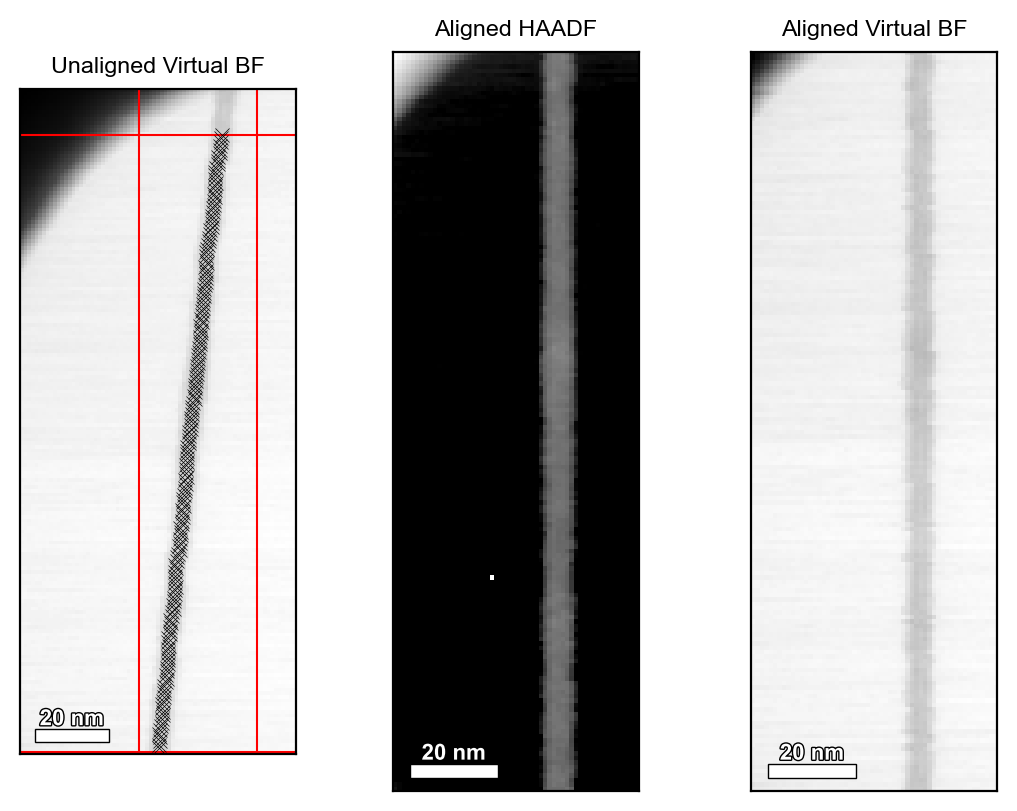

In [13]:
# Filled CNT

# Sum to get virtual BF image
FCNT_SI_Sum=np.sum(FCNT_SI,axis=2)
f,a=plt.subplots(1,3,dpi=200)
plt.setp(a,xticks=[],yticks=[])
a[0].imshow(FCNT_SI_Sum)
a[0].set_title('Unaligned Virtual BF')
CNT_F.AddScaleBar(a[0],20,FCNT_SI_cal)

R=[32,2];W=32;H=178

# Choose Fit Region
X1,X2,Y1,Y2=32,64,12,180
a[0].axvline(X1);a[0].axvline(X2);a[0].axhline(Y1);a[0].axhline(Y2)

# Find CNT Centers
TubeCenter=[]
for i in range(Y1,Y2):
    Prof=CNT_F.NormArray(-ndimage.gaussian_filter1d(FCNT_SI_Sum[i][X1:X2],2))
    fwhm=CNT_F.Get_FWFM(np.arange(X2-X1),Prof,0.5,fitpoly=True)
    hm_lo,hm_hi,w,i_c=fwhm
    a[0].plot(i_c+X1,i,marker='x',lw=0,mfc='None',ms=5,mec='k',mew=0.25)
    TubeCenter.append(i_c)

# Align CNT Centers to straight line
TubeCenter_Min =np.amin(TubeCenter)
TubeCenter_Diff=int(np.ceil(np.ptp(TubeCenter)))+1

FCNT_SI_Z_al=np.zeros((Y2-Y1,FCNT_SI_Z_dat.shape[1]-TubeCenter_Diff))
FCNT_SI_al  =np.zeros((Y2-Y1,FCNT_SI.shape[1]      -TubeCenter_Diff,FCNT_SI.shape[2]))

X_Ran_Old=np.arange(FCNT_SI.shape[1])
X_Ran_New=np.arange(FCNT_SI.shape[1]-TubeCenter_Diff)

for i in range(Y2-Y1):
    X_C=TubeCenter[i]-TubeCenter_Min

    # interpolate HAADF image (subpixel alignment)
    f_CNT_interp=interpolate.interp1d(X_Ran_Old-X_C,FCNT_SI_Z_dat[i+Y1])
    FCNT_SI_Z_al[i]=f_CNT_interp(X_Ran_New)

    # shift pixels of spectrum image (pixel alignment)
    X_C_i=int(np.floor(X_C))
    for j in X_Ran_New: FCNT_SI_al[i,j]=FCNT_SI[i+Y1,j+X_C_i]

# Display aligned HAADF and SI
a[1].imshow(CNT_F.NormArray(FCNT_SI_Z_al),norm=LogNorm(vmin=0.005,vmax=1))
a[1].set_title('Aligned HAADF')
CNT_F.AddScaleBar(a[1],20,FCNT_SI_Z_cal)

FCNT_SI_al_Sum=np.sum(FCNT_SI_al,axis=2)
a[2].imshow(FCNT_SI_al_Sum)
a[2].set_title('Aligned Virtual BF')
CNT_F.AddScaleBar(a[2],20,FCNT_SI_cal)


## Calculate O-H Stretch Slices

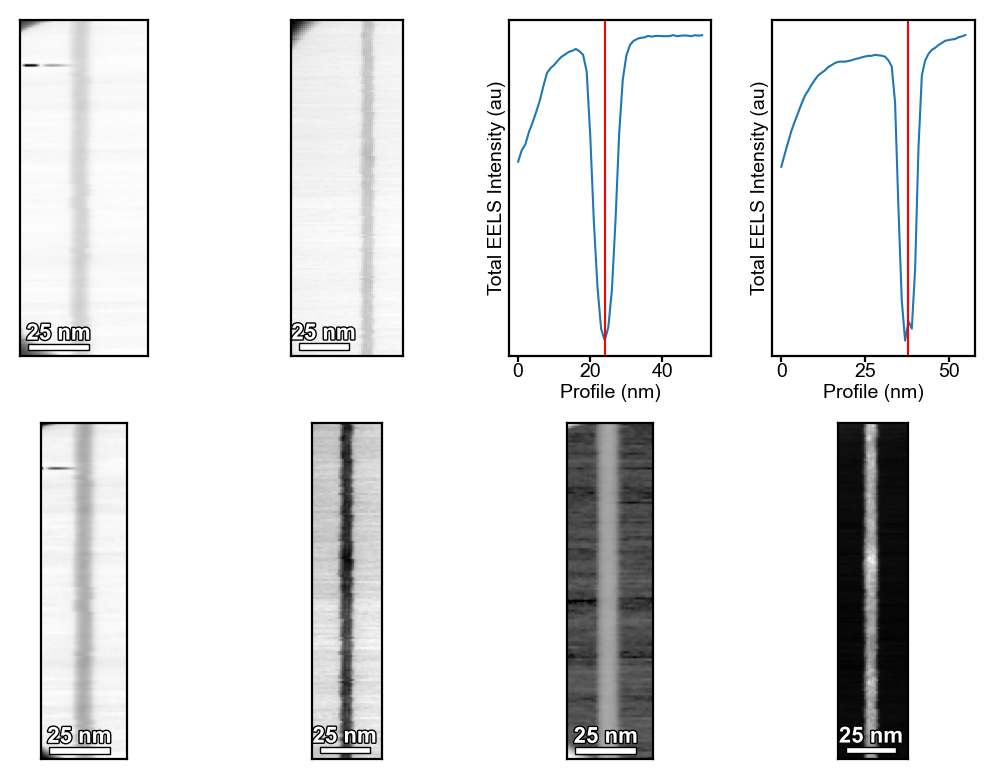

In [14]:
# Crop Aligned SI and Z Images to Similar Widths

ECNT_BF=np.average(ECNT_SI_al,axis=2)
ECNT_BF_Prof=np.average(ECNT_BF,axis=0)
ECNT_BF_D=np.arange(ECNT_BF.shape[1])*ECNT_SI_cal
FCNT_BF=np.average(FCNT_SI_al,axis=2)
FCNT_BF_Prof=np.average(FCNT_BF,axis=0)
FCNT_BF_D=np.arange(FCNT_BF.shape[1])*FCNT_SI_cal

ECNT_C=CNT_F.Get_FWFM(ECNT_BF_D,-ECNT_BF_Prof,0.75,norm='full',fitpoly=True)[-1]
FCNT_C=CNT_F.Get_FWFM(FCNT_BF_D,-FCNT_BF_Prof,0.75,norm='full',fitpoly=True)[-1]

Slice_W=np.amin([ECNT_C,FCNT_C,ECNT_BF_D[-1]-ECNT_C,FCNT_BF_D[-1]-FCNT_C])
ECNT_i1=CNT_F.Get_i(ECNT_BF_D,ECNT_C-Slice_W)
ECNT_i2=CNT_F.Get_i(ECNT_BF_D,ECNT_C+Slice_W)
FCNT_i1=CNT_F.Get_i(FCNT_BF_D,FCNT_C-Slice_W)
FCNT_i2=CNT_F.Get_i(FCNT_BF_D,FCNT_C+Slice_W)

ECNT_SI_al_C=ECNT_SI_al[:,ECNT_i1:ECNT_i2+1]
FCNT_SI_al_C=FCNT_SI_al[:,FCNT_i1:FCNT_i2+1]
ECNT_SI_Z_al_C=ECNT_SI_Z_al[:,ECNT_i1:ECNT_i2+1]
FCNT_SI_Z_al_C=FCNT_SI_Z_al[:,FCNT_i1:FCNT_i2+1]

f,a=plt.subplots(2,4,dpi=200)
plt.setp(a[0,:2],xticks=[],yticks=[])
a[0,0].imshow(ECNT_BF)
a[0,1].imshow(FCNT_BF)
plt.setp(a[0,2:],xlabel='Profile (nm)',ylabel='Total EELS Intensity (au)',yticks=[])
a[0,2].plot(ECNT_BF_D,ECNT_BF_Prof)
a[0,3].plot(FCNT_BF_D,FCNT_BF_Prof)
a[0,2].axvline(ECNT_C);a[0,3].axvline(FCNT_C)
plt.setp(a[1],xticks=[],yticks=[])

a[1,0].imshow(np.average(ECNT_SI_al_C,axis=2))
a[1,1].imshow(np.average(FCNT_SI_al_C,axis=2))
a[1,2].imshow(CNT_F.NormArray(ECNT_SI_Z_al_C),norm=LogNorm(vmin=0.005,vmax=1))
a[1,3].imshow(FCNT_SI_Z_al_C)

CNT_F.AddScaleBar(a[0,0],25,ECNT_SI_Z_cal)
CNT_F.AddScaleBar(a[0,1],25,FCNT_SI_Z_cal)
CNT_F.AddScaleBar(a[1,0],25,ECNT_SI_Z_cal)
CNT_F.AddScaleBar(a[1,1],25,FCNT_SI_Z_cal)
CNT_F.AddScaleBar(a[1,2],25,ECNT_SI_Z_cal)
CNT_F.AddScaleBar(a[1,3],25,FCNT_SI_Z_cal)

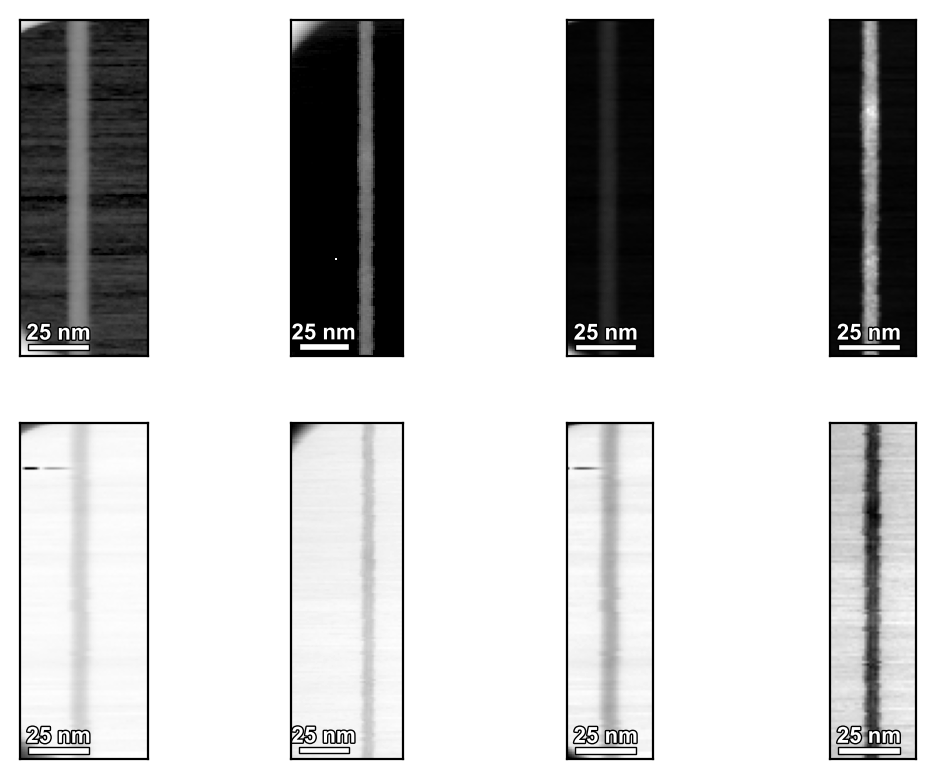

In [15]:
# Crop Aligned SI and Z Images to Similar Heights
# Note: While a generalized process could be executed here,we choose to
# cut from the top of the FCNT SI to match heights to avoid the SiN shadow

ECNT_BF_Y=np.arange(ECNT_BF.shape[0])*ECNT_SI_cal
FCNT_BF_Y=np.arange(FCNT_BF.shape[0])*FCNT_SI_cal

Cut_Y=FCNT_BF_Y[-1]-ECNT_BF_Y[-1]
FCNT_i1=CNT_F.Get_i(FCNT_BF_Y,Cut_Y)

ECNT_SI_al_CC=np.copy(ECNT_SI_al_C)
FCNT_SI_al_CC=FCNT_SI_al_C[FCNT_i1:]
ECNT_SI_Z_al_CC=np.copy(ECNT_SI_Z_al_C)
FCNT_SI_Z_al_CC=FCNT_SI_Z_al_C[FCNT_i1:]

f,a=plt.subplots(2,4,dpi=200)
plt.setp(a,xticks=[],yticks=[])
a[0,0].imshow(CNT_F.NormArray(ECNT_SI_Z_al),norm=LogNorm(vmin=0.005,vmax=1))
a[0,1].imshow(CNT_F.NormArray(FCNT_SI_Z_al),norm=LogNorm(vmin=0.005,vmax=1))
a[0,2].imshow(CNT_F.NormArray(ECNT_SI_Z_al_CC))
a[0,3].imshow(CNT_F.NormArray(FCNT_SI_Z_al_CC))

a[1,0].imshow(np.average(ECNT_SI_al,axis=2))
a[1,1].imshow(np.average(FCNT_SI_al,axis=2))
a[1,2].imshow(np.average(ECNT_SI_al_CC,axis=2))
a[1,3].imshow(np.average(FCNT_SI_al_CC,axis=2))

CNT_F.AddScaleBar(a[0,0],25,ECNT_SI_Z_cal)
CNT_F.AddScaleBar(a[0,1],25,FCNT_SI_Z_cal)
CNT_F.AddScaleBar(a[0,2],25,ECNT_SI_Z_cal)
CNT_F.AddScaleBar(a[0,3],25,FCNT_SI_Z_cal)
CNT_F.AddScaleBar(a[1,0],25,ECNT_SI_Z_cal)
CNT_F.AddScaleBar(a[1,1],25,FCNT_SI_Z_cal)
CNT_F.AddScaleBar(a[1,2],25,ECNT_SI_Z_cal)
CNT_F.AddScaleBar(a[1,3],25,FCNT_SI_Z_cal)

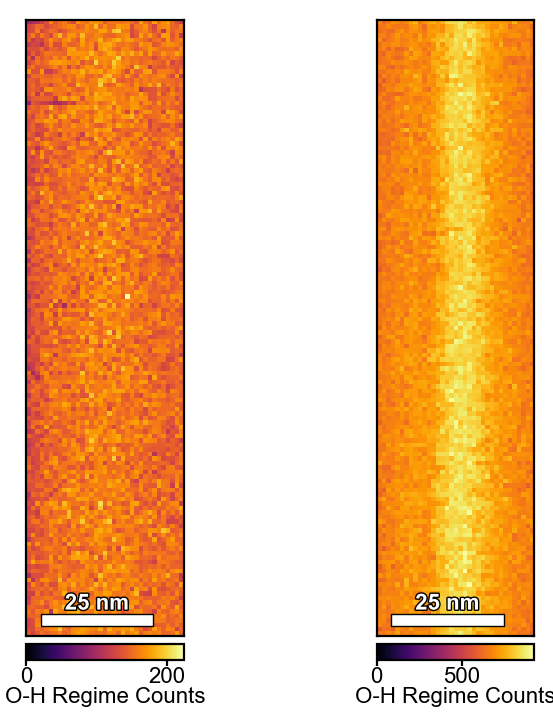

In [16]:
# Generate images of intensity between 400 and 500 meV (O-H stretch regime)

ECNT_i1,ECNT_i2=CNT_F.Get_i(ECNT_SI_E,0.4),CNT_F.Get_i(ECNT_SI_E,0.5)
FCNT_i1,FCNT_i2=CNT_F.Get_i(FCNT_SI_E,0.4),CNT_F.Get_i(FCNT_SI_E,0.5)

ECNT_OH_Slice=np.sum(ECNT_SI_al_CC[:,:,ECNT_i1:ECNT_i2],axis=2)
FCNT_OH_Slice=np.sum(FCNT_SI_al_CC[:,:,FCNT_i1:FCNT_i2],axis=2)

f,a=plt.subplots(1,2,figsize=(4,4),dpi=200)
plt.setp(a,xticks=[],yticks=[])
cb=a[0].imshow(ECNT_OH_Slice,cmap=cm.inferno,vmin=0)
CNT_F.AddColorBar(cb,a[0],f,orientation='horizontal',label='O-H Regime Counts')
CNT_F.AddScaleBar(a[0],25,ECNT_SI_cal)
cb=a[1].imshow(FCNT_OH_Slice,cmap=cm.inferno,vmin=0)
CNT_F.AddColorBar(cb,a[1],f,orientation='horizontal',label='O-H Regime Counts')
CNT_F.AddScaleBar(a[1],25,FCNT_SI_cal)

3.162766513358394


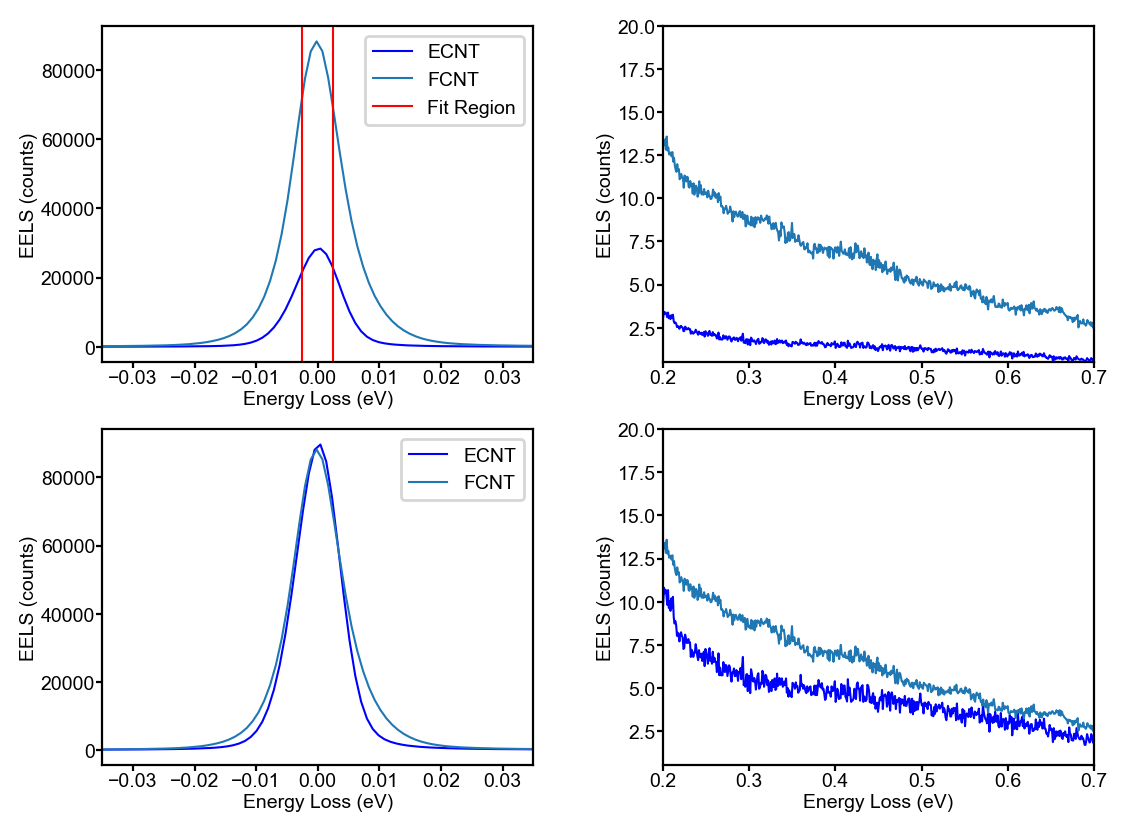

In [17]:
# Normalize to ZLP Intensity (Taken from right most pixels of the SI (furthest away from CNT and SiN grid)

ECNT_ZLP_Ref=np.average(ECNT_SI_al_CC[:,-1],axis=0)
FCNT_ZLP_Ref=np.average(FCNT_SI_al_CC[:,-1],axis=0)

Norm_Ran=(-0.0025,0.0025)
ECNT_Norm_i=CNT_F.Get_i(ECNT_SI_E,Norm_Ran[0]),CNT_F.Get_i(ECNT_SI_E,Norm_Ran[1])
FCNT_Norm_i=CNT_F.Get_i(FCNT_SI_E,Norm_Ran[0]),CNT_F.Get_i(FCNT_SI_E,Norm_Ran[1])
ECNT_ZLP_I=np.average(ECNT_ZLP_Ref[ECNT_Norm_i[0]:ECNT_Norm_i[1]])
FCNT_ZLP_I=np.average(FCNT_ZLP_Ref[FCNT_Norm_i[0]:FCNT_Norm_i[1]])
Norm=FCNT_ZLP_I/ECNT_ZLP_I

f,a=plt.subplots(2,2,dpi=200)
plt.setp(a[:,0],xlabel='Energy Loss (eV)',ylabel='EELS (counts)',xlim=(-0.035,0.035))
a[0,0].plot(ECNT_SI_E,ECNT_ZLP_Ref,color='b',label='ECNT')
a[0,0].plot(FCNT_SI_E,FCNT_ZLP_Ref,label='FCNT')
a[0,0].axvline(Norm_Ran[0]);a[0,0].axvline(Norm_Ran[1],label='Fit Region')
a[0,0].legend()
plt.setp(a[:,1],xlabel='Energy Loss (eV)',ylabel='EELS (counts)',xlim=(0.2,0.7),ylim=(5e-1,2e1))
a[0,1].plot(ECNT_SI_E,ECNT_ZLP_Ref,color='b',label='ECNT')
a[0,1].plot(FCNT_SI_E,FCNT_ZLP_Ref,label='FCNT')

a[1,0].plot(ECNT_SI_E,ECNT_ZLP_Ref*Norm,color='b',label='ECNT')
a[1,0].plot(FCNT_SI_E,FCNT_ZLP_Ref,label='FCNT')
a[1,0].legend()
a[1,1].plot(ECNT_SI_E,ECNT_ZLP_Ref*Norm,color='b',label='ECNT')
a[1,1].plot(FCNT_SI_E,FCNT_ZLP_Ref,label='FCNT')

print(Norm)

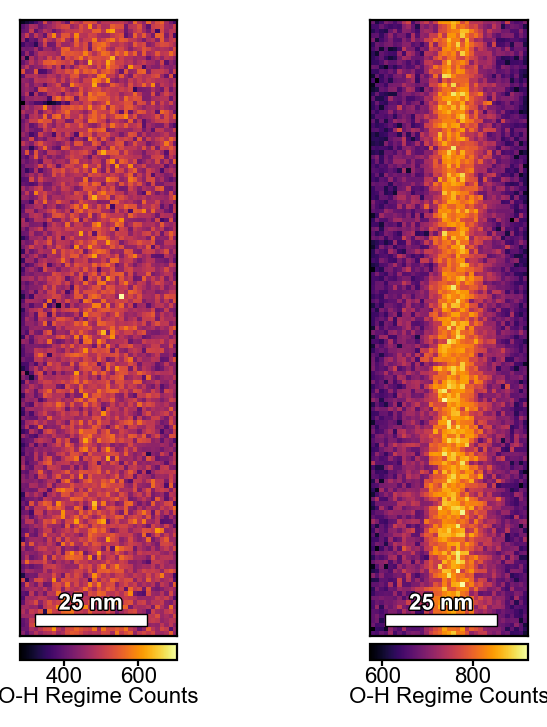

In [18]:
# Examine Normalized Slices

f,a=plt.subplots(1,2,figsize=(4,4),dpi=200)
plt.setp(a,xticks=[],yticks=[])
cb=a[0].imshow(ECNT_OH_Slice*Norm,cmap=cm.inferno)
CNT_F.AddColorBar(cb,a[0],f,orientation='horizontal',label='O-H Regime Counts')
CNT_F.AddScaleBar(a[0],25,ECNT_SI_cal)
cb=a[1].imshow(FCNT_OH_Slice,cmap=cm.inferno)
CNT_F.AddColorBar(cb,a[1],f,orientation='horizontal',label='O-H Regime Counts')
CNT_F.AddScaleBar(a[1],25,FCNT_SI_cal)

# Figure

Text(0.11, 0.985, 'h')

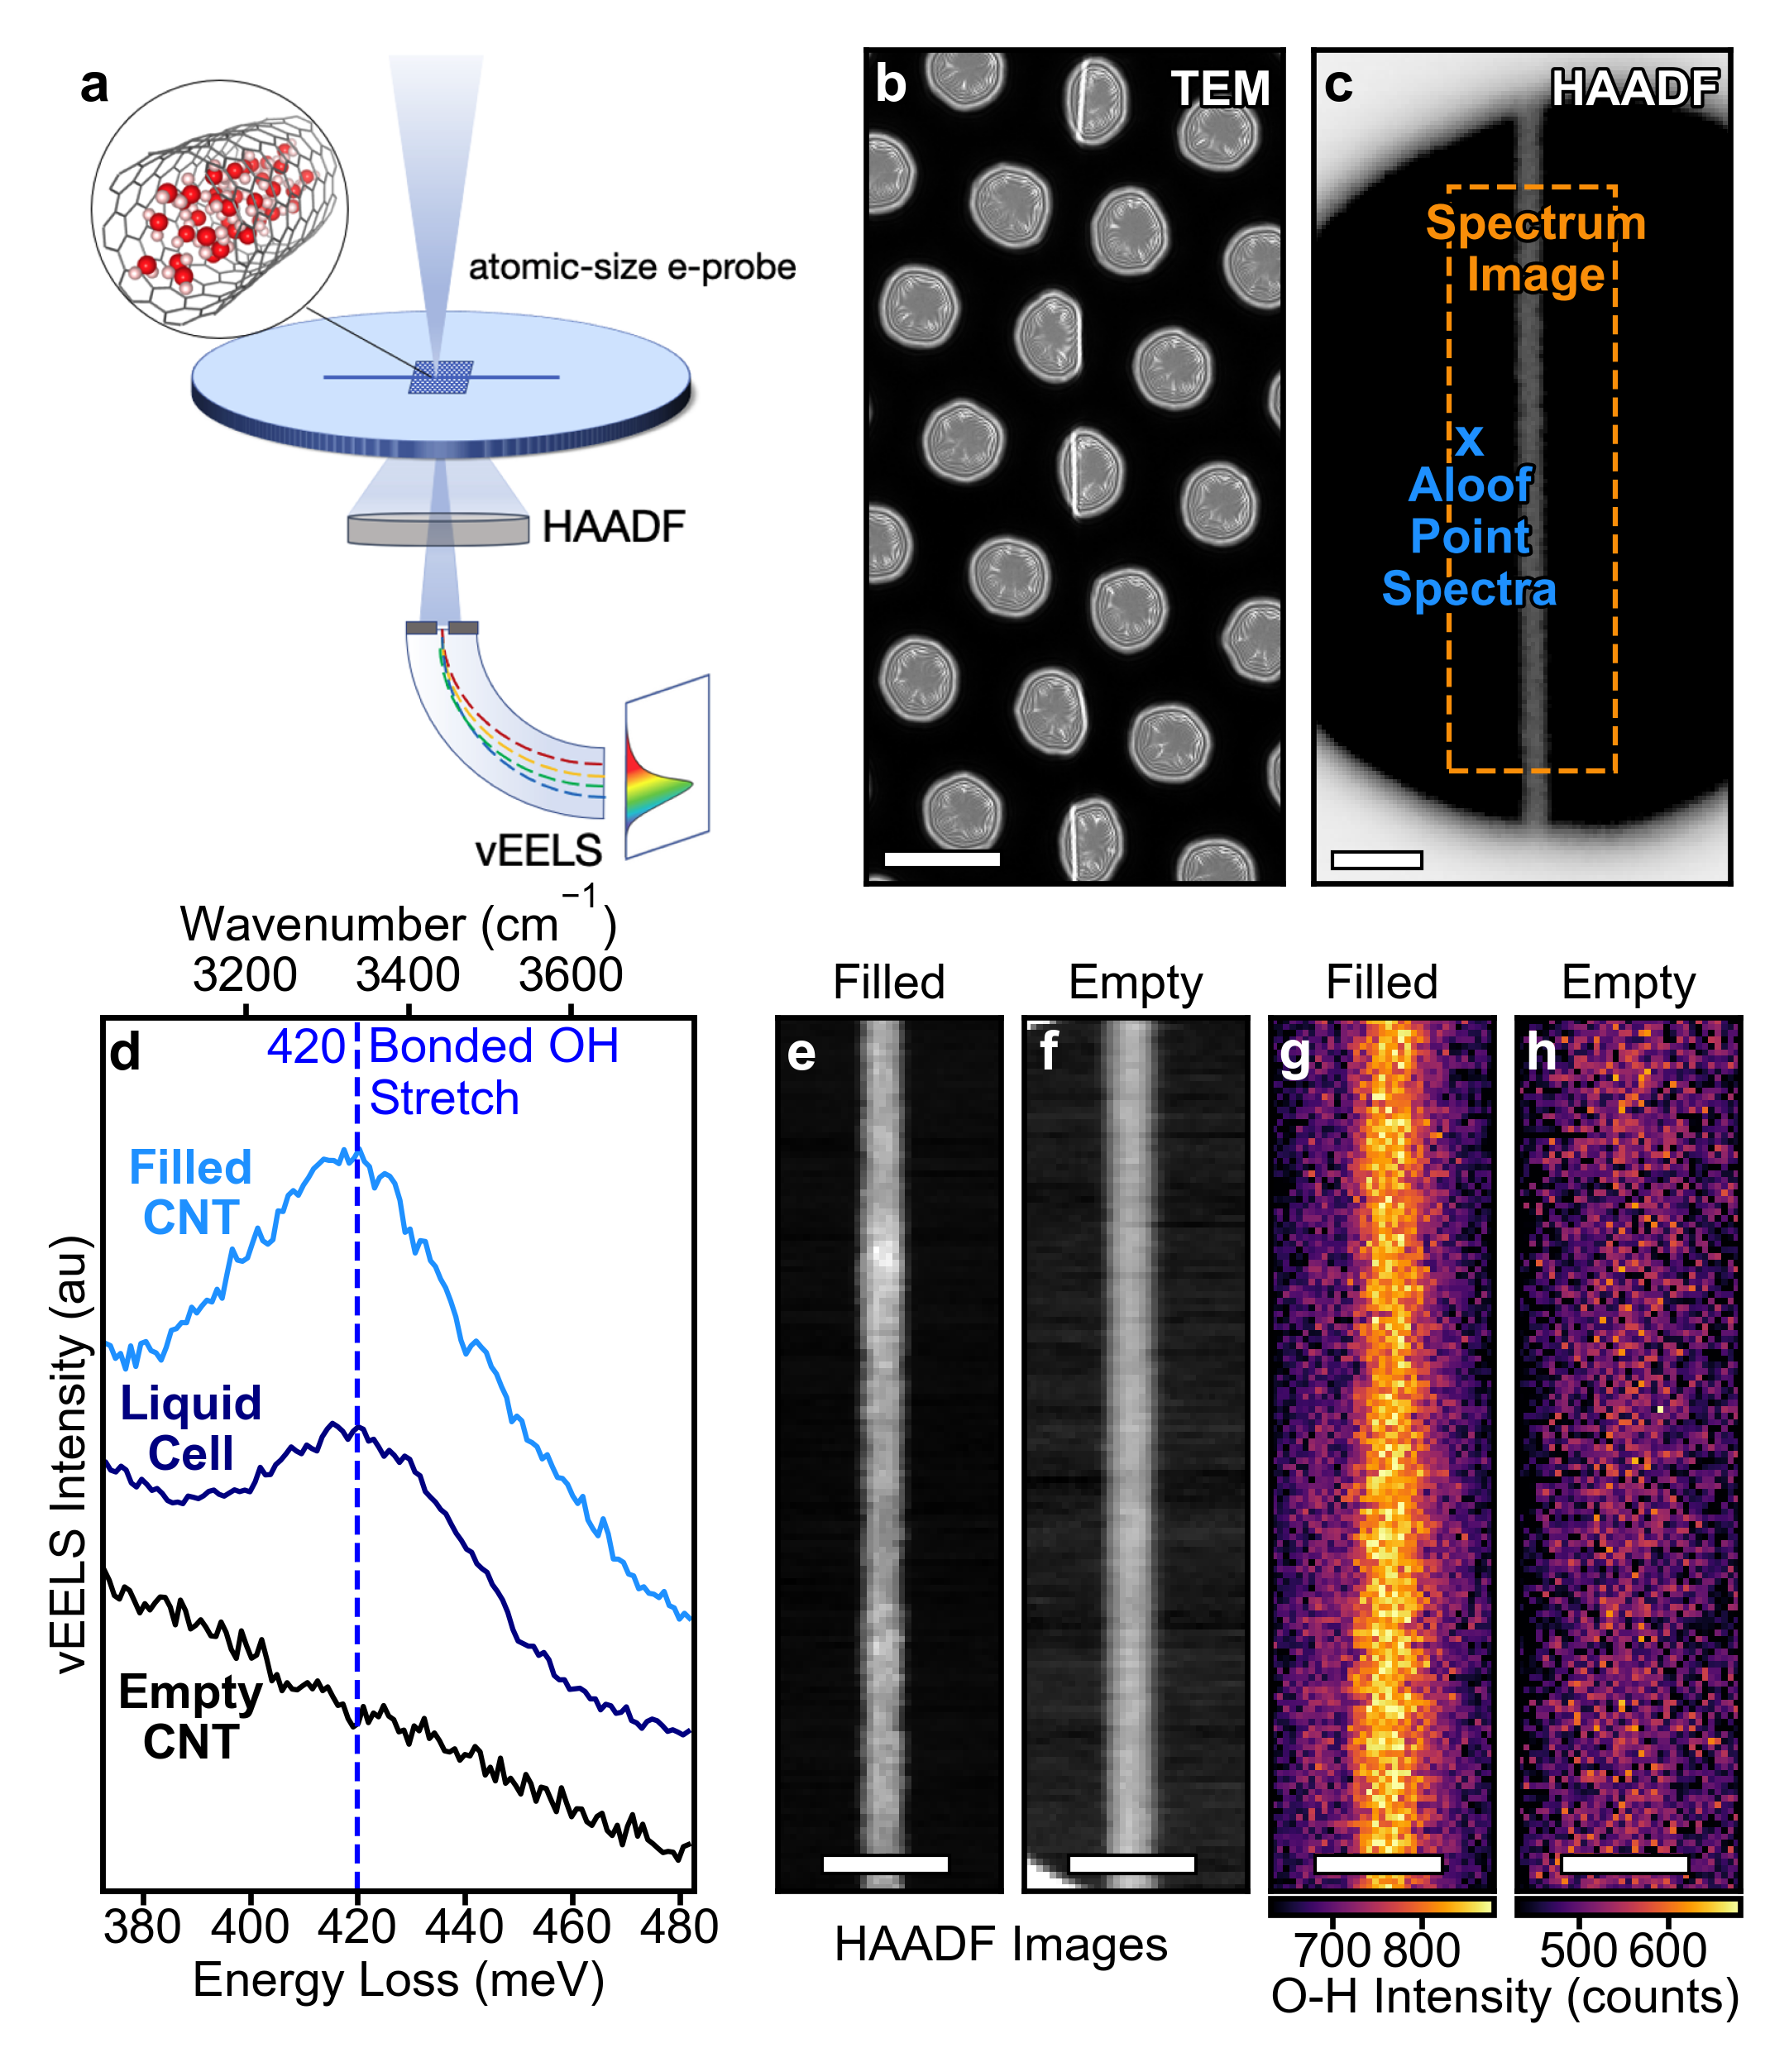

In [19]:
fig=plt.figure(figsize=(89/25.4,4),dpi=600)

# Panel a: Schematic
ax=fig.add_axes([0.025,0.575,0.42,0.42],xticks=[],yticks=[])
for spine in ax.spines.values():
    spine.set_visible(False)

ax.imshow(schematic)
labels=['a','b','c','d','e','f','g','h']
label_kwargs={'fontsize':8,'fontweight':'bold','ha':'center','va':'top'}
ax.text(0.015,0.985,labels.pop(0),transform=ax.transAxes,**label_kwargs)

# Panel b,c: TEM/STEM Images
gsTEM=plt.GridSpec(ncols=2,nrows=1,wspace=0,top=0.995,bottom=0.575,right=0.985,left=0.47)
a=np.asarray([fig.add_subplot(gsTEM[i],xticks=[],yticks=[]) for i in range(2)])

# Panel b: TEM Image
a[0].imshow(LargeFOV_rot_crop,cmap=cm.Greys_r)
a[0].text(0.975,0.975,'TEM',fontweight='bold',color='w',ha='right',va='top',
          path_effects=stroke,transform=a[0].transAxes)
CNT_F.AddScaleBar(a[0],300,LargeFOV_cal,text=False)
a[0].text(0.06,0.985,labels.pop(0),color='w',transform=a[0].transAxes,**label_kwargs)

# Panel c: STEM Image
a[1].imshow(ndimage.gaussian_filter(CNT_F.NormArray(SmallFOV_crop),0.5),cmap=cm.Greys_r,norm=LogNorm(vmin=0.005,vmax=2))
a[1].text(0.975,0.975,'HAADF',fontweight='bold',color='w',ha='right',va='top',
          path_effects=stroke,transform=a[1].transAxes)
CNT_F.AddScaleBar(a[1],30,SmallFOV_cal,text=False)
a[1].text(0.375,0.5,'x',fontsize=8,fontweight='bold',color='DodgerBlue',ha='center',va='bottom',
          path_effects=stroke,transform=a[1].transAxes)
a[1].text(0.375,0.5,'Aloof\nPoint\nSpectra',fontweight='bold',color='DodgerBlue',ha='center',va='top',
          path_effects=stroke,transform=a[1].transAxes)
a[1].add_patch(Rectangle((0.325,0.135),0.4,0.7,fc='None',ec=cm.inferno(0.75),ls='--',lw=0.75,transform=a[1].transAxes))
a[1].text(0.535,0.815,'Spectrum\nImage',fontweight='bold',color=cm.inferno(0.75),ha='center',va='top',
          path_effects=stroke,transform=a[1].transAxes)
a[1].text(0.06,0.985,labels.pop(0),transform=a[1].transAxes,**label_kwargs)

# Panel d: Aloof Spectra
ax=fig.add_axes([0.04,0.0675,0.34,0.44])
plt.setp(ax,xlim=(PS_E1 * 1000,PS_E2 * 1000),xticks=[380,400,420,440,460,480],
         ylim=(-0.6,2.7),yticks=[],xlabel='Energy Loss (meV)',ylabel='vEELS Intensity (au)')
ax.plot(LC_E_C*1000,LC_S_CN,color='Navy')
ax.plot(FCNT_E_C*1000,FCNT_S_CN+0.45,color='DodgerBlue')
ax.plot(ECNT_E_C*1000,ECNT_S_CN-0.45,color='k')
ax.axvline(420,color='b',ls='--')
ax.text(418,0.985*ax.get_ylim()[1],'420',ha='right',va='top',color='b')
ax.text(422,0.985*ax.get_ylim()[1],'Bonded OH\nStretch',ha='left',va='top',color='b')
a2=ax.twiny()
a2.set_xlim(375 * 8.06554,465 * 8.06554)
a2.set_xlabel(r'Wavenumber (cm$^{-1}$)',labelpad=2)
ax.text(0.15,0.85,'Filled\nCNT',ha='center',va='top',color='DodgerBlue',fontweight='bold',transform=ax.transAxes)
ax.text(0.15,0.58,'Liquid\nCell',ha='center',va='top',color='Navy',fontweight='bold',transform=ax.transAxes)
ax.text(0.15,0.25,'Empty\nCNT',ha='center',va='top',color='k',fontweight='bold',transform=ax.transAxes)
ax.text(0.0375,0.985,labels.pop(0),transform=ax.transAxes,**label_kwargs)

# Panels e-h: Spectrum Image Slices
gsEELS=plt.GridSpec(ncols=4,nrows=1,wspace=0.05,top=0.5075,bottom=0.0675,right=0.985,left=0.425)
a=np.asarray([fig.add_subplot(gsEELS[i],xticks=[],yticks=[]) for i in range(4)])

# Panel e: Filled CNT HAADF
a[0].imshow(FCNT_SI_Z_al_CC,interpolation='none')
CNT_F.AddScaleBar(a[0],20,FCNT_SI_Z_cal,text=False,xy=(6.5,131))
a[0].set_title('Filled',y=0.975,fontsize=7)
a[0].text(0.11,0.985,labels.pop(0),color='w',transform=a[0].transAxes,**label_kwargs)

# Panel f: Empty CNT HAADF
a[1].imshow(CNT_F.NormArray(ECNT_SI_Z_al_CC),interpolation='none',vmax=0.225)
CNT_F.AddScaleBar(a[1],20,ECNT_SI_Z_cal,text=False,xy=(6.5,131))
a[1].set_title('Empty',y=0.975,fontsize=7)
a[1].set_xlabel('HAADF Images',labelpad=5,x=-0.1)
a[1].text(0.11,0.985,labels.pop(0),color='w',transform=a[1].transAxes,**label_kwargs)

# Panel g: Filled CNT Spectrum Slice
cb=a[2].imshow(FCNT_OH_Slice,cmap=cm.inferno,vmin=630,vmax=880)
a[2].set_title('Filled',y=0.975,fontsize=7)
CNT_F.AddColorBar(cb,a[2],fig,orientation='horizontal',label='O-H Intensity (counts)',cb_x=1.05,w=0.008,fontsize=7)
CNT_F.AddScaleBar(a[2],20,FCNT_SI_cal,text=False,xy=(6.5,131))
a[2].text(0.11,0.985,labels.pop(0),color='w',transform=a[2].transAxes,**label_kwargs)

# Panel h: Empty CNT Spectrum Slice
cb=a[3].imshow(ECNT_OH_Slice * Norm,cmap=cm.inferno,vmin=430,vmax=680)
a[3].set_title('Empty',y=0.975,fontsize=7)
CNT_F.AddColorBar(cb,a[3],fig,orientation='horizontal',w=0.008,fontsize=7)
CNT_F.AddScaleBar(a[3],20,ECNT_SI_cal,text=False,xy=(6.5,131))
a[3].text(0.11,0.985,labels.pop(0),color='w',transform=a[3].transAxes,**label_kwargs)